### Lee csv y grafica las aceleraciones.

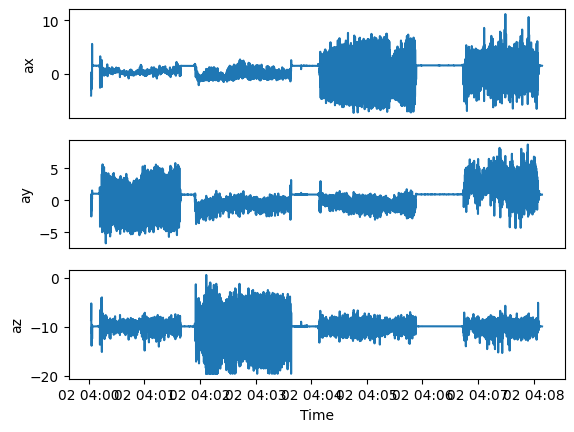

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

ruta_archivo = 'Archivos_CSV_sin_etiquetas/Medicion_manual_test_accelGyro.csv'
data = pd.read_csv(ruta_archivo)
data['dateTime_UTC'] = pd.to_datetime(data['dateTime_UTC'])
tiempo = data['dateTime_UTC']

ax = data['ax']
ay = data['ay']
az = data['az']
gx = data['gx']
gy = data['gy']
gz = data['gz']


fig, (ax1,ax2,ax3) = plt.subplots(3, 1 )
#figsize=(8, 4.5)

ax1.plot(tiempo, ax)
ax1.set_ylabel("ax")
ax1.set_xticks([])


ax2.plot(tiempo, ay)
ax2.set_ylabel("ay")
ax2.set_xticks([])

ax3.plot(tiempo, az)
ax3.set_ylabel("az")
ax3.set_xlabel("Time")

plt.show()



# Etiqueto los movimientos

### Medición tortuga

In [30]:
# Definir los intervalos de tiempo y las actividades correspondientes
actividades = {
    (pd.Timestamp('1999-01-15 09:34:48.796200'),pd.Timestamp('1999-01-15 09:36:31.475400')): 'Caminando', 
    (pd.Timestamp('1999-01-15 09:36:31.544600'),pd.Timestamp('1999-01-15 09:36:42.133100')): 'Quieta',    
    (pd.Timestamp('1999-01-15 09:36:42.202200'),pd.Timestamp('1999-01-15 09:40:20.633000')): 'Caminando',
    (pd.Timestamp('1999-01-15 09:40:20.702100'),pd.Timestamp('1999-01-15 09:43:07.729300')): 'Quieta',
    (pd.Timestamp('1999-01-15 09:43:07.798500'),pd.Timestamp('1999-01-15 09:43:57.484200')): 'Caminando',
    (pd.Timestamp('1999-01-15 09:43:57.553300'),pd.Timestamp('1999-01-15 09:53:23.946500')): 'Quieta',
    (pd.Timestamp('1999-01-15 09:53:24.015700'),pd.Timestamp('1999-01-15 09:53:52.037300')): 'Caminando', #Esto en realidad no lo registré, pero parece un movimiento en la gráfica (lo que sí estoy seguro es que no estaba comiendo)
    (pd.Timestamp('1999-01-15 09:53:52.106500'),pd.Timestamp('1999-01-15 09:56:35.674300')): 'Quieta',
    (pd.Timestamp('1999-01-15 09:56:35.743400'),pd.Timestamp('1999-01-15 09:57:33.379600')): 'Caminando',
    (pd.Timestamp('1999-01-15 09:57:33.448800'),pd.Timestamp('1999-01-15 10:04:32.130600')): 'Quieta',
    (pd.Timestamp('1999-01-15 10:04:32.199800'),pd.Timestamp('1999-01-15 10:19:38.049000')): 'Comiendo',
    (pd.Timestamp('1999-01-15 10:19:38.118200'),pd.Timestamp('1999-01-15 10:20:09.391600')): 'Quieta',
    (pd.Timestamp('1999-01-15 10:20:09.460800'),pd.Timestamp('1999-01-15 10:20:54.714000')): 'Comiendo',
    (pd.Timestamp('1999-01-15 10:20:54.783200'),pd.Timestamp('1999-01-15 10:22:15.522800')): 'Quieta',
    (pd.Timestamp('1999-01-15 10:22:15.592000'),pd.Timestamp('1999-01-15 10:23:47.068900')): 'Comiendo',
    (pd.Timestamp('1999-01-15 10:23:47.138100'),pd.Timestamp('1999-01-15 10:24:15.362200')): 'Quieta',
    (pd.Timestamp('1999-01-15 10:24:15.431300'),pd.Timestamp('1999-01-15 10:26:16.099500')): 'Comiendo',
    (pd.Timestamp('1999-01-15 10:26:16.168700'),pd.Timestamp('1999-01-15 10:28:26.317800')): 'Quieta',
    (pd.Timestamp('1999-01-15 10:28:26.387000'),pd.Timestamp('1999-01-15 10:29:16.688400')): 'Caminando',
    (pd.Timestamp('1999-01-15 10:29:16.757600'),pd.Timestamp('1999-01-15 10:31:11.761800')): 'Quieta'
}

tiempo_actual=0

# Función para asignar actividad basada en los intervalos de tiempo
def asignar_actividad(row):
    
    tiempo_actual = row['dateTime_UTC']

    for intervalo, actividad in actividades.items():
        inicio, fin = intervalo
        if inicio <= tiempo_actual <= fin:
            return actividad  # Devolver la etiqueta de actividad
    return None

# Aplicar la función a cada fila para crear una nueva columna 'actividad'
data['Actividades'] = data.apply(asignar_actividad, axis=1)

# Guardar el archivo CSV modificado
data.to_csv('Archivos_con_etiquetas/Medicion_tortuga_accelGyro_etiquetado.csv', index=False)


In [31]:
import pandas as pd

# Leer el archivo CSV original
df = pd.read_csv('Archivos_con_etiquetas/Medicion_tortuga_accelGyro_etiquetado.csv')

# Convertir la columna de tiempo a un formato datetime
df['dateTime_UTC'] = pd.to_datetime(df['dateTime_UTC'])

# Definir los intervalos de tiempo para train y test
intervalos_train = [
    (pd.Timestamp('1999-01-15 09:34:48.796200'),pd.Timestamp('1999-01-15 09:35:40.132000')),
    (pd.Timestamp('1999-01-15 09:36:31.544600'),pd.Timestamp('1999-01-15 09:36:36.804600')),
    (pd.Timestamp('1999-01-15 09:36:42.202200'),pd.Timestamp('1999-01-15 09:38:31.383700')),
    (pd.Timestamp('1999-01-15 09:40:20.702100'),pd.Timestamp('1999-01-15 09:41:44.215900')),
    (pd.Timestamp('1999-01-15 09:43:07.798500'),pd.Timestamp('1999-01-15 09:43:32.641000')),
    (pd.Timestamp('1999-01-15 09:43:57.553300'),pd.Timestamp('1999-01-15 09:48:15.910500')),
    (pd.Timestamp('1999-01-15 09:53:24.015700'),pd.Timestamp('1999-01-15 09:53:37.992900')),
    (pd.Timestamp('1999-01-15 09:53:52.106500'),pd.Timestamp('1999-01-15 09:55:13.897400')),
    (pd.Timestamp('1999-01-15 09:56:35.743400'),pd.Timestamp('1999-01-15 09:57:04.529500')),
    (pd.Timestamp('1999-01-15 09:57:33.448800'),pd.Timestamp('1999-01-15 10:01:02.758200')),
    (pd.Timestamp('1999-01-15 10:04:32.199800'),pd.Timestamp('1999-01-15 10:12:05.741700')),
    (pd.Timestamp('1999-01-15 10:19:38.118200'),pd.Timestamp('1999-01-15 10:19:53.749200')),
    (pd.Timestamp('1999-01-15 10:20:09.460800'),pd.Timestamp('1999-01-15 10:20:32.082000')),
    (pd.Timestamp('1999-01-15 10:20:54.783200'),pd.Timestamp('1999-01-15 10:21:35.121900')),
    (pd.Timestamp('1999-01-15 10:22:15.592000'),pd.Timestamp('1999-01-15 10:23:01.327600')),
    (pd.Timestamp('1999-01-15 10:23:47.138100'),pd.Timestamp('1999-01-15 10:24:01.253100')),
    (pd.Timestamp('1999-01-15 10:24:15.431300'),pd.Timestamp('1999-01-15 10:25:15.765300')),
    (pd.Timestamp('1999-01-15 10:26:16.168700'),pd.Timestamp('1999-01-15 10:27:21.209100')),
    (pd.Timestamp('1999-01-15 10:28:26.387000'),pd.Timestamp('1999-01-15 10:28:51.503100')),
    (pd.Timestamp('1999-01-15 10:29:16.757600'),pd.Timestamp('1999-01-15 10:30:14.262600'))
    
]

intervalos_test = [
    (pd.Timestamp('1999-01-15 09:35:40.201200'),pd.Timestamp('1999-01-15 09:36:31.475400')),
    (pd.Timestamp('1999-01-15 09:36:36.873800'),pd.Timestamp('1999-01-15 09:36:42.133100')),
    (pd.Timestamp('1999-01-15 09:38:31.452900'),pd.Timestamp('1999-01-15 09:40:20.633000')),
    (pd.Timestamp('1999-01-15 09:41:44.285100'),pd.Timestamp('1999-01-15 09:43:07.729300')),
    (pd.Timestamp('1999-01-15 09:43:32.710200'),pd.Timestamp('1999-01-15 09:43:57.484200')),
    (pd.Timestamp('1999-01-15 09:48:15.979700'),pd.Timestamp('1999-01-15 09:53:23.946500')),
    (pd.Timestamp('1999-01-15 09:53:38.062100'),pd.Timestamp('1999-01-15 09:53:52.037300')),
    (pd.Timestamp('1999-01-15 09:55:13.966500'),pd.Timestamp('1999-01-15 09:56:35.674300')),
    (pd.Timestamp('1999-01-15 09:57:04.598700'),pd.Timestamp('1999-01-15 09:57:33.379600')),
    (pd.Timestamp('1999-01-15 10:01:02.827400'),pd.Timestamp('1999-01-15 10:04:32.130600')),
    (pd.Timestamp('1999-01-15 10:12:05.810900'),pd.Timestamp('1999-01-15 10:19:38.049000')),
    (pd.Timestamp('1999-01-15 10:19:53.819400'),pd.Timestamp('1999-01-15 10:20:09.391600')),
    (pd.Timestamp('1999-01-15 10:20:32.151100'),pd.Timestamp('1999-01-15 10:20:54.714000')),
    (pd.Timestamp('1999-01-15 10:21:35.192400'),pd.Timestamp('1999-01-15 10:22:15.522800')),
    (pd.Timestamp('1999-01-15 10:23:01.396800'),pd.Timestamp('1999-01-15 10:23:47.068900')),
    (pd.Timestamp('1999-01-15 10:24:01.322300'),pd.Timestamp('1999-01-15 10:24:15.362200')),
    (pd.Timestamp('1999-01-15 10:25:15.834500'),pd.Timestamp('1999-01-15 10:26:16.099500')),
    (pd.Timestamp('1999-01-15 10:27:21.278300'),pd.Timestamp('1999-01-15 10:28:26.317800')),
    (pd.Timestamp('1999-01-15 10:28:51.572300'),pd.Timestamp('1999-01-15 10:29:16.688400')),
    (pd.Timestamp('1999-01-15 10:30:14.331800'),pd.Timestamp('1999-01-15 10:31:11.761800'))
]

# Filtrar las filas según los intervalos de train
train_df = pd.concat([
    df[(df['dateTime_UTC'] >= pd.to_datetime(inicio)) & (df['dateTime_UTC'] <= pd.to_datetime(fin))]
    for inicio, fin in intervalos_train
])

# Filtrar las filas según los intervalos de test
test_df = pd.concat([
    df[(df['dateTime_UTC'] >= pd.to_datetime(inicio)) & (df['dateTime_UTC'] <= pd.to_datetime(fin))]
    for inicio, fin in intervalos_test
])

# Guardar los nuevos archivos CSV
train_df.to_csv('Archivos_con_etiquetas/train_tortuga.csv', index=False)
test_df.to_csv('Archivos_con_etiquetas/test_tortuga.csv', index=False)



### Medición manual train

In [33]:
data = pd.read_csv('Archivos_CSV_sin_etiquetas/Medicion_manual_train_accelGyro.csv')
data['dateTime_UTC'] = pd.to_datetime(data['dateTime_UTC'])
# Definir los intervalos de tiempo y las actividades correspondientes
actividades = {
    (pd.Timestamp('1999-01-02 04:00:02.4324'),pd.Timestamp('1999-01-02 04:00:13.0574')): 'Quieto', 
    (pd.Timestamp('1999-01-02 04:00:13.1264'),pd.Timestamp('1999-01-02 04:01:40.4941')): 'Movimiento_1',    
    (pd.Timestamp('1999-01-02 04:01:40.5633'),pd.Timestamp('1999-01-02 04:01:50.3875')): 'Quieto',
    (pd.Timestamp('1999-01-02 04:01:50.4567'),pd.Timestamp('1999-01-02 04:02:48.5069')): 'Movimiento_2',
    (pd.Timestamp('1999-01-02 04:02:48.5761'),pd.Timestamp('1999-01-02 04:03:09.5365')): 'Quieto',
    (pd.Timestamp('1999-01-02 04:03:09.6057'),pd.Timestamp('1999-01-02 04:04:23.8471')): 'Movimiento_3',
    (pd.Timestamp('1999-01-02 04:04:23.9163'),pd.Timestamp('1999-01-02 04:04:38.5851')): 'Quieto', 
    (pd.Timestamp('1999-01-02 04:04:38.6543'),pd.Timestamp('1999-01-02 04:06:02.9294')): 'Movimiento_4',
    (pd.Timestamp('1999-01-02 04:06:02.9986'),pd.Timestamp('1999-01-02 04:06:07.2882')): 'Quieto',
    
}
tiempo_actual=0

# Función para asignar actividad basada en los intervalos de tiempo
def asignar_actividad(row):
    
    tiempo_actual = row['dateTime_UTC']

    for intervalo, actividad in actividades.items():
        inicio, fin = intervalo
        if inicio <= tiempo_actual <= fin:
            return actividad  # Devolver la etiqueta de actividad
    return None

# Aplicar la función a cada fila para crear una nueva columna 'actividad'
data['Actividades'] = data.apply(asignar_actividad, axis=1)

# Guardar el archivo CSV modificado
data.to_csv('Archivos_con_etiquetas/Medicion_manual_train_accelGyro_etiquetado.csv', index=False)

### Medición manual test

In [35]:
data = pd.read_csv('Archivos_CSV_sin_etiquetas/Medicion_manual_test_accelGyro.csv')
data['dateTime_UTC'] = pd.to_datetime(data['dateTime_UTC'])

# Definir los intervalos de tiempo y las actividades correspondientes
actividades = {
    (pd.Timestamp('1999-01-02 04:00:02.4334'),pd.Timestamp('1999-01-02 04:00:11.8163')): 'Quieto', 
    (pd.Timestamp('1999-01-02 04:00:11.8853'),pd.Timestamp('1999-01-02 04:01:38.7758')): 'Movimiento_3',    
    (pd.Timestamp('1999-01-02 04:01:38.8447'),pd.Timestamp('1999-01-02 04:01:55.0877')): 'Quieto',
    (pd.Timestamp('1999-01-02 04:01:55.1569'),pd.Timestamp('1999-01-02 04:03:37.5635')): 'Movimiento_1',
    (pd.Timestamp('1999-01-02 04:03:37.6327'),pd.Timestamp('1999-01-02 04:04:09.1814')): 'Quieto',
    (pd.Timestamp('1999-01-02 04:04:09.2506'),pd.Timestamp('1999-01-02 04:05:52.4831')): 'Movimiento_2',
    (pd.Timestamp('1999-01-02 04:05:52.5523'),pd.Timestamp('1999-01-02 04:06:44.7219')): 'Quieto', 
    (pd.Timestamp('1999-01-02 04:06:44.7911'),pd.Timestamp('1999-01-02 04:08:04.2935')): 'Movimiento_4',
    (pd.Timestamp('1999-01-02 04:08:04.3627'),pd.Timestamp('1999-01-02 04:08:08.9297')): 'Quieto',
    
}
tiempo_actual=0

# Función para asignar actividad basada en los intervalos de tiempo
def asignar_actividad(row):
    
    tiempo_actual = row['dateTime_UTC']

    for intervalo, actividad in actividades.items():
        inicio, fin = intervalo
        if inicio <= tiempo_actual <= fin:
            return actividad  # Devolver la etiqueta de actividad
    return None

# Aplicar la función a cada fila para crear una nueva columna 'actividad'
data['Actividades'] = data.apply(asignar_actividad, axis=1)

# Guardar el archivo CSV modificado
data.to_csv('Archivos_con_etiquetas/Medicion_manual_test_accelGyro_etiquetado.csv', index=False)